# Import Modules

In [1]:
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image


from sklearn.metrics import accuracy_score

# Load the Image

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
from pathlib import Path

img1 = "/content/drive/MyDrive/Shared With Others/IVP_Finals/water_body_Original.jpg"
mask1 = "/content/drive/MyDrive/Shared With Others/IVP_Finals/water_body_mask.jpg"


img2 = "/content/drive/MyDrive/Shared With Others/IVP_Finals/water_body_1.jpg"
mask2 = "/content/drive/MyDrive/Shared With Others/IVP_Finals/water_body_1_mask.jpg"

In [4]:
img = cv2.imread(img1)
expected_mask = cv2.imread(mask1)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<ipython-input-5-7d562fc0d1f2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


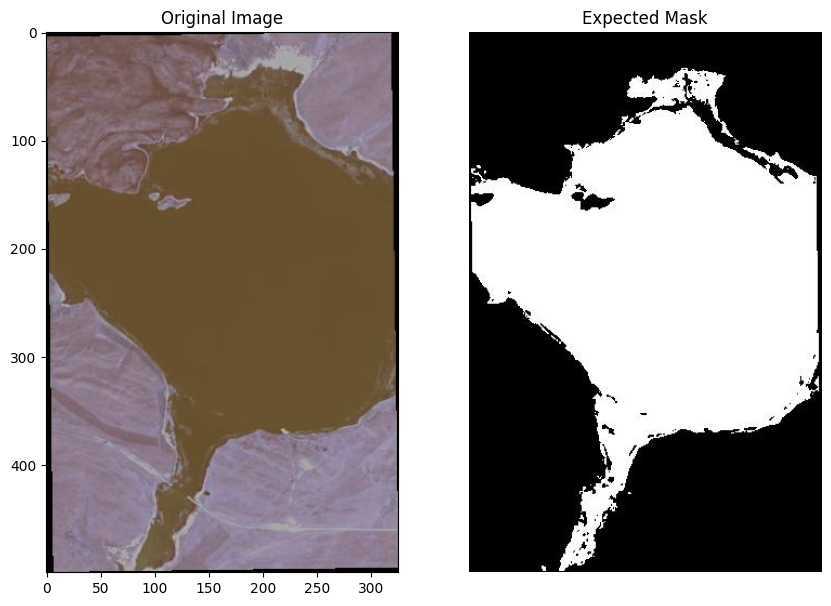

In [5]:
plt.figure(figsize=(10, 10))
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(expected_mask)
plt.title('Expected Mask')

plt.axis('off')
plt.show()

array([[[0, 0, 3],
        [0, 1, 4],
        [0, 1, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 6],
        [0, 2, 6],
        [2, 3, 7],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 2, 0],
        [0, 1, 0],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 0],
        [0, 1, 0],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 0],
        [0, 1, 0],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
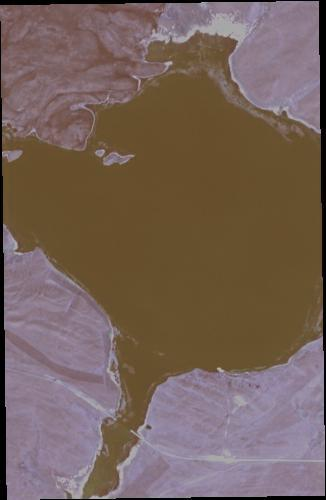

In [6]:
# Image Array
img

In [7]:
img.shape

(500, 326, 3)

# Convert to Greyscale

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding

In [9]:
mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]

# Output

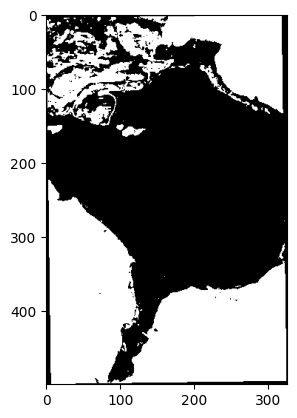

In [10]:
plt.imshow(mask, cmap='gray')
plt.show()

In [11]:
np.unique(mask)

array([  0, 255], dtype=uint8)

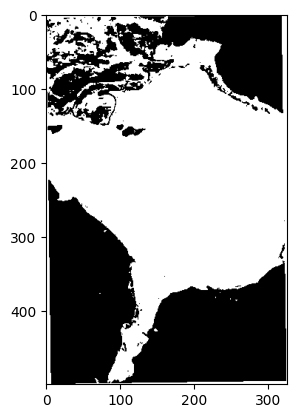

In [12]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')
plt.show()

In [13]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Try to tune these, but this will work
lower_blue = (70, 100, 0)
upper_blue = (130, 255, 255)

mask = cv2.inRange(hsv, lower_blue, upper_blue)

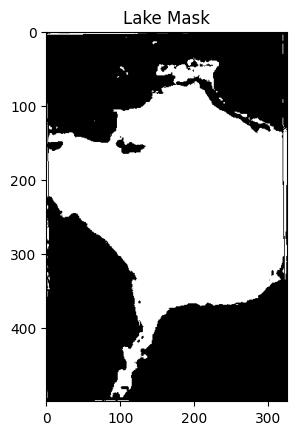

In [14]:
plt.imshow(mask, cmap='gray')
plt.title('Lake Mask')
plt.show()

# Metrics

In [15]:
expected_mask.shape

(500, 326, 3)

In [16]:
mask.shape

(500, 326)

In [26]:
expected_mask = cv2.cvtColor(expected_mask, cv2.COLOR_BGR2GRAY)

In [18]:
accuracy = accuracy_score(expected_mask.flatten(), mask.flatten())

print("Accuracy:", accuracy)

Accuracy: 0.9193926380368098


### DICE and IOU Score
[Taken from here](https://www.kaggle.com/code/nghihuynh/understanding-evaluation-metrics-in-segmentation)

In [27]:
def dice_coef(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
    dice = np.mean(2*intersect/total_sum)
    return round(dice, 3)

def iou(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    iou = np.mean(intersect/union)
    return round(iou, 3)

dice = dice_coef(expected_mask, mask)
iou_score = iou(expected_mask, mask)

# Other Improvements

# Try for the other image

In [22]:
img = cv2.imread(img2)
expected_mask = cv2.imread(mask2)

<ipython-input-23-7d562fc0d1f2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


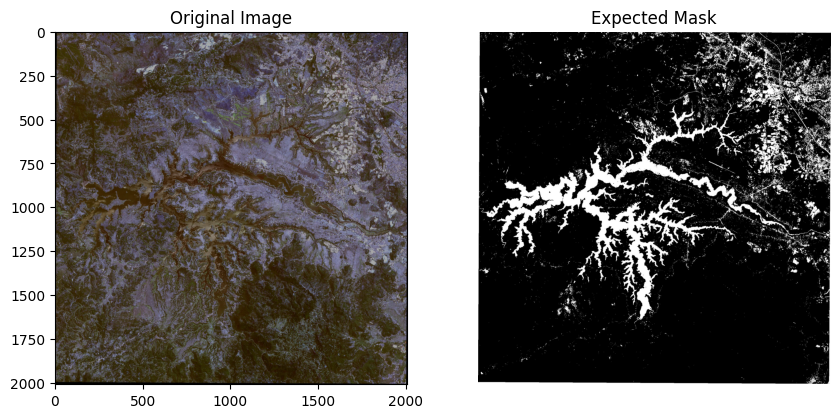

In [23]:
plt.figure(figsize=(10, 10))
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(expected_mask)
plt.title('Expected Mask')

plt.axis('off')
plt.show()

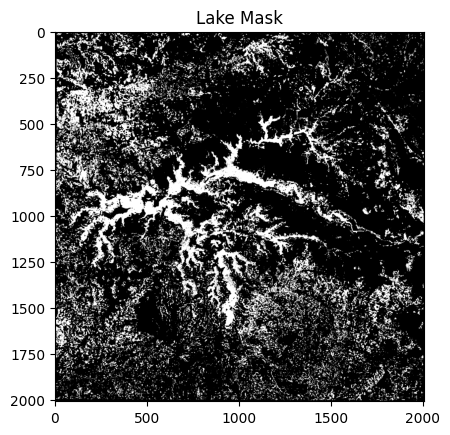

In [24]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = (100, 75, 50)
upper_blue = (130, 255, 255)

mask = cv2.inRange(hsv, lower_blue, upper_blue)

plt.imshow(mask, cmap='gray')
plt.title('Lake Mask')
plt.show()

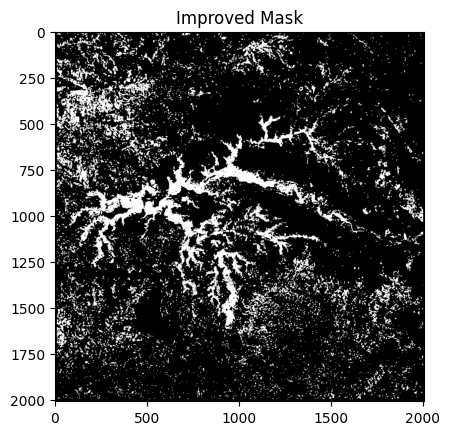

In [30]:
border_size = 10
mask[0:border_size, :] = 0
mask[-border_size:, :] = 0
mask[:, 0:border_size] = 0
mask[:, -border_size:] = 0

kernel = np.ones((3, 3), dtype=np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)

plt.imshow(mask, cmap='gray')
plt.title('Improved Mask')
plt.show()